In [1]:
!pip install pycuda

In [2]:
!pip install scikit-cuda

Imports.

In [0]:
import numpy as np
import pycuda.autoinit
import pycuda.gpuarray as gpuarray
import skcuda.fft as cu_fft

import cv2
import matplotlib.pyplot as plt

Loading the image. ```.astype(float)``` copies the array and casts it to ```float```. ```np.asarray``` converts a list to an array.

float64


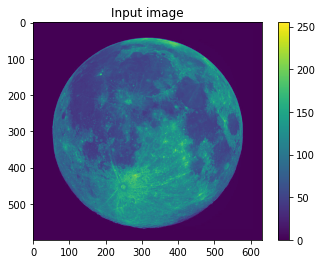

In [4]:
filename    = 'moonFree.jpg'
img         = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img         = img.astype(float)
img         = np.asarray(img, float)

plt.figure(1)
plt.imshow(img)
plt.colorbar()
plt.title('Input image')

print(img.dtype)

Numpy FFT.

complex128


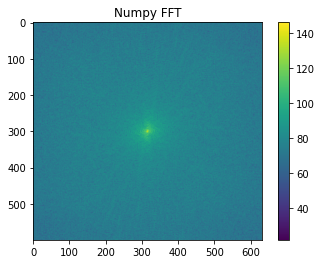

In [5]:
fft1 = np.fft.fftshift(np.fft.fft2(img))

plt.figure(2)
plt.imshow(20 * np.log10(np.abs(fft1)))
plt.colorbar()
plt.title('Numpy FFT')

print(fft1.dtype)

CUDA FFT.

Text(0.5, 1.0, 'CUDA FFT')

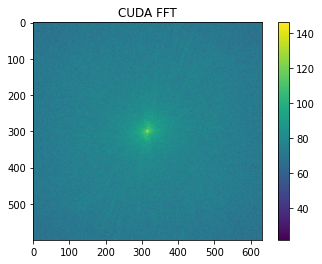

In [6]:
# --- Get the array shape
n1, n2 = img.shape

# --- Move the image from host to device
d_img  = gpuarray.to_gpu(np.asarray(img, complex))

# --- Initialise the output gpuarray. For real to complex transformations, the fft function computes N / 2 + 1 non-redundant coefficients of a length-N input signal.
d_fft2 = gpuarray.empty((n1, n2), np.complex128)

# --- Forward FFT
plan_forward = cu_fft.Plan((n1, n2), np.complex128, np.complex128)
cu_fft.fft(d_img, d_fft2, plan_forward)

fft2_temp   = d_fft2.get()
fft2        = np.fft.fftshift(fft2_temp)

plt.figure(3)
plt.imshow(20 * np.log10(np.abs(fft2)))
plt.colorbar()
plt.title('CUDA FFT')

Numpy IFFT.

Text(0.5, 1.0, 'Numpy IFFT - phase')

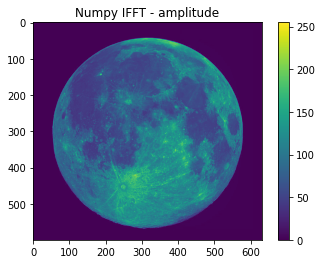

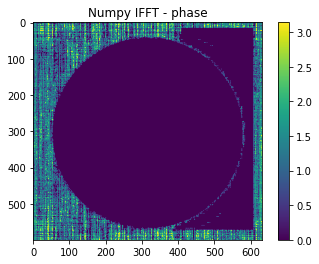

In [9]:
img1 = np.real(np.fft.ifft2(np.fft.ifftshift(fft1)))

plt.figure(4)
plt.imshow(np.abs(img1))
plt.colorbar()
plt.title('Numpy IFFT - amplitude')

plt.figure(5)
plt.imshow(np.angle(img1))
plt.colorbar()
plt.title('Numpy IFFT - phase')

CUDA IFFT.

Text(0.5, 1.0, 'CUDA IFFT - phase')

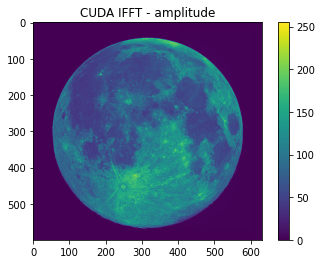

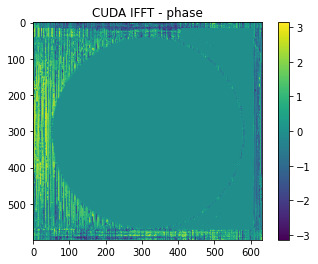

In [10]:
# --- Initialise empty output gpuarray 
d_img2 = gpuarray.empty((n1, n2), np.complex128)
    
# --- Inverse FFT
plan_backward = cu_fft.Plan((n1, n2), np.complex128, np.complex128)
cu_fft.ifft(d_fft2, d_img2, plan_backward, scale = True)
    
img2   = d_img2.get()

plt.figure(6)
plt.imshow(np.abs(img2))
plt.colorbar()
plt.title('CUDA IFFT - amplitude')

plt.figure(7)
plt.imshow(np.angle(img2))
plt.colorbar()
plt.title('CUDA IFFT - phase')